# **Mount Drive**

* **Make Drive Directory Visible**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Load Libraries***

* **Libraries for Wrangling, Visualizing, Scaling, etc**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 

from numpy import hstack 
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* **Libraries for Modeling using LSTM**

In [0]:
from tensorflow.python.keras import Sequential      #Create Sequential Layer
from tensorflow.python.keras.layers import LSTM     #Create LSTM Layer
from tensorflow.python.keras.layers import GRU      #Create GRU Layer / Scenario
from tensorflow.python.keras.layers import Dense    #Create Output Layer
from tensorflow.python.keras.layers import Dropout  #Create Regularization

* **Determine Open/Save Directory**

In [0]:
pathDatasets = '/content/drive/My Drive/Colab/College - Final Projects/Datasets/' #Getting Datasets
pathResults = '/content/drive/My Drive/Colab/College - Final Projects/Results/' #Saving Excel, Image, etc

# **Getting Datasets**

* **Load Data**

In [5]:
dataset_Kurs = pd.read_csv(pathDatasets + 'USD_IDR.csv', thousands= ",")      #Predictor
dataset_ASII = pd.read_csv(pathDatasets + 'Stock ASII.csv', thousands = ",")  #Regresor (Main)
dataset_KAEF = pd.read_csv(pathDatasets + 'Stock KAEF.csv', thousands = ",")  #Regresor (Scenario)
dataset_SMGR = pd.read_csv(pathDatasets + 'Stock SMGR.csv', thousands = ",")  #Regresor (Scenario)
dataset_ASII


,Date,Price,Open,High,Low,Vol.,Change %
0,"Sep 30, 2019",6600,6650,6675,6575,21.09M,-0.75%
1,"Sep 27, 2019",6650,6700,6700,6600,9.83M,-0.75%
2,"Sep 26, 2019",6700,6575,6700,6525,37.98M,3.08%
3,"Sep 25, 2019",6500,6400,6500,6400,17.78M,0.39%
4,"Sep 24, 2019",6475,6575,6625,6450,29.74M,-2.26%
...,...,...,...,...,...,...,...
1208,"Oct 07, 2014",6800,6725,6825,6700,24.54M,1.12%
1209,"Oct 06, 2014",6725,6600,6750,6600,23.27M,1.89%
1210,"Oct 03, 2014",6600,6700,6700,6450,52.77M,0.00%
1211,"Oct 02, 2014",6600,6975,6975,6600,77.53M,-5.71%


* **Merge Data with Left Join (Ref: dataset_Kurs)**

In [6]:
dataset_merge = [dataset_Kurs, dataset_ASII, dataset_KAEF, dataset_SMGR]
dataset_merge = reduce(lambda left,right: pd.merge(left,right,on='Date',how='left'), dataset_merge)
dataset_merge['Date']

0       Sep 30, 2019
1       Sep 27, 2019
2       Sep 26, 2019
3       Sep 25, 2019
4       Sep 24, 2019
            ...     
1299    Oct 07, 2014
1300    Oct 06, 2014
1301    Oct 03, 2014
1302    Oct 02, 2014
1303    Oct 01, 2014
Name: Date, Length: 1304, dtype: object

* **Set Data to Appropriate Order based on Date**

In [7]:
dataset_merge = dataset_merge.iloc[::-1]    #Reverse Order
dataset_merge = dataset_merge.reset_index() #Reset to ASC Index
dataset_merge['Date']

0       Oct 01, 2014
1       Oct 02, 2014
2       Oct 03, 2014
3       Oct 06, 2014
4       Oct 07, 2014
            ...     
1299    Sep 24, 2019
1300    Sep 25, 2019
1301    Sep 26, 2019
1302    Sep 27, 2019
1303    Sep 30, 2019
Name: Date, Length: 1304, dtype: object

* **Drop some Columns and Renaming**

In [0]:
dataset_merge = dataset_merge.drop(['index', 'Change %_x', 'Change %_y', 'Vol.', 'Vol._x', 'Vol._y'], axis = 1)
dataset_merge.columns = ['Date', 
                         'Price_Kurs', 'Open_Kurs', 'High_Kurs', 'Low_Kurs',
                         'Price_ASII', 'Open_ASII', 'High_ASII', 'Low_ASII',
                         'Price_KAEF', 'Open_KAEF', 'High_KAEF', 'Low_KAEF',
                         'Price_SMGR', 'Open_SMGR', 'High_SMGR', 'Low_SMGR']

# **Data Exploration**

* **Check for Appropriate Data Types**

In [9]:
dataset_merge.dtypes

Date           object
Price_Kurs    float64
Open_Kurs     float64
High_Kurs     float64
Low_Kurs      float64
Price_ASII    float64
Open_ASII     float64
High_ASII     float64
Low_ASII      float64
Price_KAEF    float64
Open_KAEF     float64
High_KAEF     float64
Low_KAEF      float64
Price_SMGR    float64
Open_SMGR     float64
High_SMGR     float64
Low_SMGR      float64
dtype: object

* **Correlation Plot for Feature Selection**

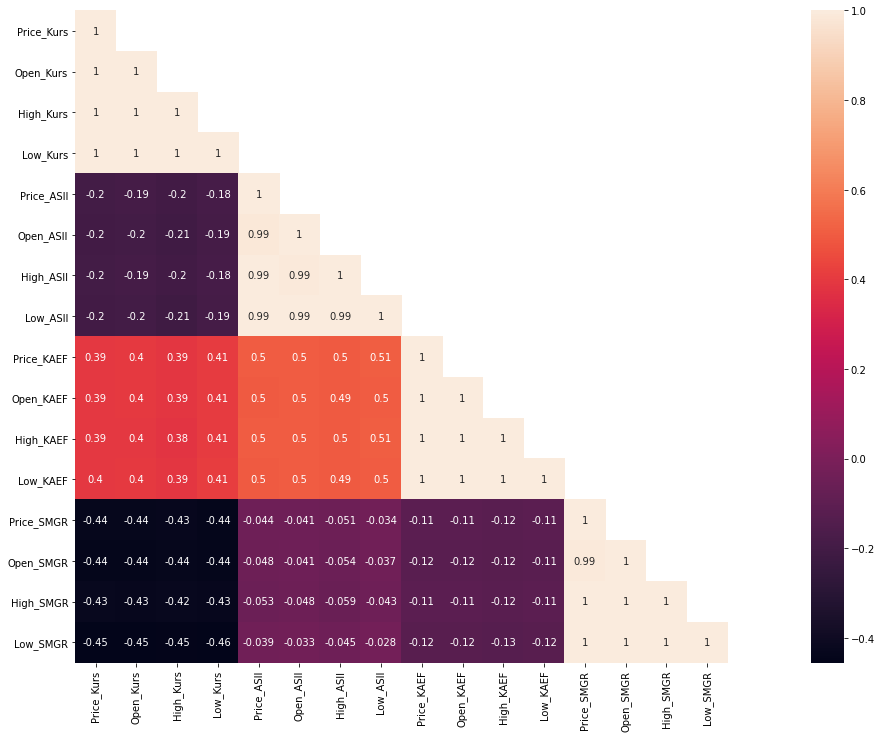

In [10]:
cor_mat = dataset_merge[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)


* **Stacked Line Plot for Looking the Trend**

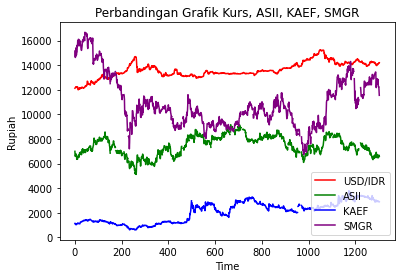

In [11]:
plt.plot(dataset_merge['Price_Kurs'], color = 'red', label = 'USD/IDR')
plt.plot(dataset_merge['Price_ASII'], color = 'green', label = 'ASII')
plt.plot(dataset_merge['Price_KAEF'], color = 'blue', label = 'KAEF')
plt.plot(dataset_merge['Price_SMGR'], color = 'purple', label = 'SMGR')
plt.title('Perbandingan Grafik Kurs, ASII, KAEF, SMGR')
plt.xlabel('Time')
plt.ylabel('Rupiah')
plt.legend()
plt.show()

# ***Pre-Processing - Feature Selection***

* **Open, High and Low can be Represented by Price Columns**

In [12]:
dataset_merge = dataset_merge.drop(['Open_Kurs', 'High_Kurs', 'Low_Kurs', 'Open_ASII', 'High_ASII', 'Low_ASII', 'Open_KAEF', 'High_KAEF', 'Low_KAEF', 'Open_SMGR', 'High_SMGR', 'Low_SMGR'], axis = 1)
dataset_merge

,Date,Price_Kurs,Price_ASII,Price_KAEF,Price_SMGR
0,"Oct 01, 2014",12127.5,7000.0,1145.0,15150.0
1,"Oct 02, 2014",12150.0,6600.0,1105.0,14700.0
2,"Oct 03, 2014",12176.5,6600.0,1070.0,14625.0
3,"Oct 06, 2014",12210.0,6725.0,1080.0,15050.0
4,"Oct 07, 2014",12202.5,6800.0,1065.0,15400.0
...,...,...,...,...,...
1299,"Sep 24, 2019",14112.5,6475.0,2940.0,12275.0
1300,"Sep 25, 2019",14150.0,6500.0,2910.0,12225.0
1301,"Sep 26, 2019",14177.5,6700.0,2930.0,12250.0
1302,"Sep 27, 2019",14165.0,6650.0,2920.0,11850.0


# ***Pre-Processing - Fill Missing Values***

* **Check Number of Missing Values**

In [13]:
dataset_merge.isnull().values.any()
dataset_merge.isnull().sum()

Date           0
Price_Kurs     0
Price_ASII    91
Price_KAEF    92
Price_SMGR    91
dtype: int64

* **Fill the Missing Values based on Previous Record**

In [14]:
dataset_merge = dataset_merge.fillna(method='ffill') #Based on Previous Record
dataset_merge.isnull().values.any()

False

# ***Pre-Processing - Split into Train/Test***

* **Determine the Test Proportion**

In [0]:
n_testProp = 0.3 #Adjustable

* **Start Spliting for Both Univariate and Multicariate Cases**

In [0]:
#Split Data Row Univariate - Price ASII Can be Change to: Price_KAEF, Price_SMGR
data_Univariate = dataset_merge.loc[:,['Price_ASII']] 
data_trainUni, data_testUni = train_test_split(data_Univariate, test_size=n_testProp, shuffle=False)
data_testUni = data_testUni.reset_index().iloc[:,1:2]
data_testActual = data_testUni

#Split Data Row Multivariate - Price ASII Can be Change to: Price_KAEF, Price_SMGR
data_Multivariate = dataset_merge.loc[:,['Price_Kurs', 'Price_ASII']]
data_trainMulti, data_testMulti = train_test_split(data_Multivariate, test_size=n_testProp, shuffle=False)
data_testMulti = data_testMulti.reset_index().iloc[:,1:3]
data_trainMultiKurs, data_trainMultiSaham = data_trainMulti.iloc[:,0:1], data_trainMulti.iloc[:,1:2]

# ***Pre-Processing - Feature Scaling***

* **Scaling Train Univariate**

In [17]:
sc = MinMaxScaler(feature_range = (0, 1)) 
data_trainUni = sc.fit_transform(data_trainUni)

for i in range(5):        #Sampling 5 Row 
	print(data_trainUni[i]) #Merge for Check Data Structure

[0.46583851]
[0.36645963]
[0.36645963]
[0.39751553]
[0.41614907]


* **Scaling Train Multivariate using Different Scaler**

In [18]:
scI = MinMaxScaler(feature_range = (0, 1))
scD = MinMaxScaler(feature_range = (0, 1))
data_trainMultiKurs = scI.fit_transform(data_trainMultiKurs)
data_trainMultiSaham = scD.fit_transform(data_trainMultiSaham)

for i in range(5):                                        #Sampling 5 Row 
	print(data_trainMultiKurs[i], data_trainMultiSaham[i])  #Merge for Check Data Structure

[0.04726599] [0.46583851]
[0.05560704] [0.36645963]
[0.06543095] [0.36645963]
[0.07784986] [0.39751553]
[0.07506951] [0.41614907]


# ***Pre-Processing - Build Data Structure***

* **Determine the Timestep, with Illustration**
![Illustration Timestep](https://drive.google.com/uc?id=1igBCmcwPCyv2Q3D4mTS7NVAZd8RXWa0C)

In [0]:
n_timestep = 2 #Adjustable

* **Univariate Training Set Data Structure**

In [20]:
x_trainUni = [] #Univariate Predictor
y_trainUni = [] #Univariate Regresor
for i in range(n_timestep, len(data_trainUni)):
    x_trainUni.append(data_trainUni[i-n_timestep:i, 0])
    y_trainUni.append(data_trainUni [i, 0])
x_trainUni, y_trainUni = np.array(x_trainUni), np.array(y_trainUni)
x_trainUni = np.reshape(x_trainUni, (x_trainUni.shape[0], x_trainUni.shape[1], 1))

for i in range(5):                    #Sampling 5 Row  
	print(x_trainUni[i], y_trainUni[i]) #Merge for Check Data Structure

[[0.46583851]
 [0.36645963]] 0.36645962732919246
[[0.36645963]
 [0.36645963]] 0.39751552795031064
[[0.36645963]
 [0.39751553]] 0.4161490683229814
[[0.39751553]
 [0.41614907]] 0.3913043478260869
[[0.41614907]
 [0.39130435]] 0.39751552795031064


* **Multivariate Training Set Data Structure**

In [21]:
data_trainMultiHstack = hstack((data_trainMultiKurs, data_trainMultiSaham)) #Make one Cell consist of n_timestep
x_trainMulti = [] #Univariate Predictor
y_trainMulti = [] #Univariate Regresor
for i in range(n_timestep, len(data_trainMultiHstack)):
    x_trainMulti.append(data_trainMultiHstack[(i-n_timestep):i])
    y_trainMulti.append(data_trainMultiSaham[i,0])
x_trainMulti, y_trainMulti = np.array(x_trainMulti), np.array(y_trainMulti)

for i in range(5):                        #Sampling 5 Row 
	print(x_trainMulti[i], y_trainMulti[i]) #Merge for Check Data Structure

[[0.04726599 0.46583851]
 [0.05560704 0.36645963]] 0.36645962732919246
[[0.05560704 0.36645963]
 [0.06543095 0.36645963]] 0.39751552795031064
[[0.06543095 0.36645963]
 [0.07784986 0.39751553]] 0.4161490683229814
[[0.07784986 0.39751553]
 [0.07506951 0.41614907]] 0.3913043478260869
[[0.07506951 0.41614907]
 [0.08897127 0.39130435]] 0.39751552795031064


* **Univariate Test Set Data Structure**

In [22]:
inputs_uni = data_Univariate[len(data_Univariate) - len(data_testUni) - n_timestep:].values 
inputs_uni = sc.transform(inputs_uni)

x_testUni = []        #Univariate Predictor for Forecasting
for i in range(n_timestep, len(inputs_uni)): 
    x_testUni.append(inputs_uni[i-n_timestep:i, 0])
x_testUni = np.array(x_testUni)
x_testUni = np.reshape(x_testUni, (x_testUni.shape[0], x_testUni.shape[1], 1))

for i in range(5):    #Sampling 5 Row 
	print(x_testUni[i]) #Merge for Check Data Structure

[[0.49068323]
 [0.54037267]]
[[0.54037267]
 [0.54037267]]
[[0.54037267]
 [0.60248447]]
[[0.60248447]
 [0.63354037]]
[[0.63354037]
 [0.60869565]]


* **Multivariate Test Set Data Structure**

In [23]:
inputs_multi = data_Multivariate[len(data_Multivariate) - len(data_testMulti) - n_timestep:].values
inputs_multi = pd.DataFrame(inputs_multi) 
inputs_multi.columns = ['Price_Kurs', 'Price_Saham']

data_testMultiKurs, data_testMultiSaham = inputs_multi.iloc[:,0:1], inputs_multi.iloc[:,1:2] 
data_testMultiKurs = scI.transform(data_testMultiKurs)
data_testMultiSaham = scD.transform(data_testMultiSaham)
data_testMultiHstack = hstack((data_testMultiKurs, data_testMultiSaham))

x_testMulti = []        #Multivariate Predictor for Forecasting
for i in range(n_timestep, len(inputs_multi)): 
    x_testMulti.append(data_testMultiHstack[i-n_timestep:i, : ])
x_testMulti = np.array(x_testMulti)
x_testMulti = x_testMulti.reshape((x_testMulti.shape[0], x_testMulti.shape[1], 2))

for i in range(5):      #Sampling 5 Row 
	print(x_testMulti[i]) #Merge for Check Data Structure

[[0.65356812 0.49068323]
 [0.65430955 0.54037267]]
[[0.65430955 0.54037267]
 [0.65430955 0.54037267]]
[[0.65430955 0.54037267]
 [0.6502317  0.60248447]]
[[0.6502317  0.60248447]
 [0.65412419 0.63354037]]
[[0.65412419 0.63354037]
 [0.65486562 0.60869565]]


# ***Model Construction / Training***

* **Determine Adjustable Parameters into Variables**

In [0]:
n_DenseUnits = 1                #Since the Output are Consist of 1 Results
n_loss = 'mean_squared_error'   #Loss Function

n_LSTMunits = 10      #Adjustable : 10, 30, 50
n_DropoutRate = 0.1   #Adjustable : 0.1, 0.3, 0.5
n_optimizer = 'Adam'  #Adjustable : Adam, RMSprop, SGD
n_epoch = 50          #Adjustable : 50, 100, 150, 200
n_batchsize = 32      #Adjustable : 32, 64, 96

* **Build Univariate LSTM Models**

In [25]:
modelUni = Sequential()
modelUni.add(LSTM(units = n_LSTMunits, input_shape = (x_trainUni.shape[1], x_trainUni.shape[2]))) #1 is Timestep
modelUni.add(Dropout(rate = n_DropoutRate))
modelUni.add(Dense(units = n_DenseUnits))
modelUni.compile(optimizer = n_optimizer, loss = n_loss)

#Record the Training Time & Last Loss in Model Construction
startTrain = time.perf_counter()
historyUni = modelUni.fit(x = x_trainUni, y = y_trainUni, epochs = n_epoch, batch_size = n_batchsize)
elapsedTrainUni = time.perf_counter() - startTrain
TTUni = '%.4f' % elapsedTrainUni
LastLossUni = '%.4f' % historyUni.history['loss'][-1]

Epoch 1/50
29/29 [==============================] - 0s 2ms/step - loss: 0.2801
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 0.1692
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0838
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0208
Epoch 6/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 8/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 9/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 10/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 11/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 12/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 13/50
29/29 [==============================

* **Build Multivariate LSTM Models**

In [26]:
modelMulti = Sequential()
modelMulti.add(LSTM(units = n_LSTMunits, input_shape = (x_trainMulti.shape[1] , x_trainMulti.shape[2]))) #1 is Timestep
modelMulti.add(Dropout(rate = n_DropoutRate))
modelMulti.add(Dense(units = n_DenseUnits))
modelMulti.compile(optimizer = n_optimizer, loss = n_loss)

#Record the Training Time & Last Loss in Model Construction
startTrain = time.perf_counter()
historyMulti = modelMulti.fit(x = x_trainMulti, y = y_trainMulti, epochs = n_epoch, batch_size = n_batchsize)
elapsedTrainMulti = time.perf_counter() - startTrain
TTMulti = '%.4f' % elapsedTrainMulti
LastLossMulti = '%.4f' % historyMulti.history['loss'][-1]

Epoch 1/50
29/29 [==============================] - 0s 2ms/step - loss: 0.2936
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 0.1635
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 6/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 8/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 9/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 10/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 11/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 12/50
29/29 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 13/50
29/29 [==============================

* **Stacked Line Plot for See Training Loss**

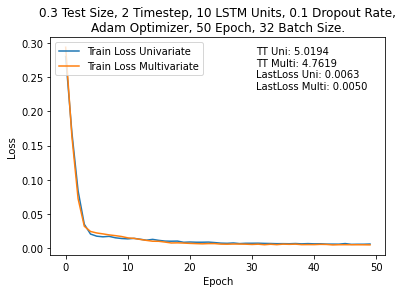

In [27]:
figLoss = plt.gcf()
plt.plot(historyUni.history['loss'])
plt.plot(historyMulti.history['loss'])
plt.title(str(n_testProp)+ ' Test Size, ' +str(n_timestep)+ ' Timestep, ' +str(n_LSTMunits)+ ' LSTM Units, ' +str(n_DropoutRate)+ ' Dropout Rate,\n'
          +str(n_optimizer)+ ' Optimizer, ' +str(n_epoch)+ ' Epoch, ' +str(n_batchsize)+ ' Batch Size.')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.figtext(0.60, 0.70, "TT Uni: " +str(TTUni)+ "\nTT Multi: " +str(TTMulti)+ "\nLastLoss Uni: " +str(LastLossUni)+ "\nLastLoss Multi: " +str(LastLossMulti))
plt.legend(['Train Loss Univariate', 'Train Loss Multivariate'], loc='upper left')
plt.show()

#Save Image of Plot for Training Loss
figLoss.savefig(pathResults +str(n_testProp)+ ' Test Size, ' +str(n_timestep)+ ' Timestep, ' +str(n_LSTMunits)+ ' LSTM Units, ' +str(n_DropoutRate)+ ' Dropout Rate, '
          +str(n_optimizer)+ ' Optimizer, ' +str(n_epoch)+ ' Epoch, ' +str(n_batchsize)+ ' Batch Size - Training Loss.png', dpi = 100)

# ***Model Prediction / Testing***

* **Forecast with Univariate LSTM Models**

In [0]:
y_testUni = modelUni.predict(x_testUni)
data_testPredUni = sc.inverse_transform(y_testUni)      #Denormalization <> Scaling

* **Forecast with Multivariate LSTM Models**

In [0]:
y_testMulti = modelMulti.predict(x_testMulti) 
data_testPredMulti = scD.inverse_transform(y_testMulti) #Denormalization <> Scaling

* **Combine and Save Result to Variable for Recaps in Excel**


In [0]:
A_PredictionResult = np.hstack([data_testPredUni,data_testPredMulti])
A_PredictionResult = np.around(A_PredictionResult, decimals=2, out=None)
A_PredictionResult = A_PredictionResult.astype(str)     #Array String - Results Comma

# ***Model Evaluation***

* **Mean Absolute Percentage Error Calculation Function**


In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPEUni = '%.4f' % mean_absolute_percentage_error(data_testUni, data_testPredUni)         #Univariate
MAPEMulti = '%.4f' % mean_absolute_percentage_error(data_testActual, data_testPredMulti)  #Multivariate

* **Stacked Line Plot for See Forecast Result & Evaluation**

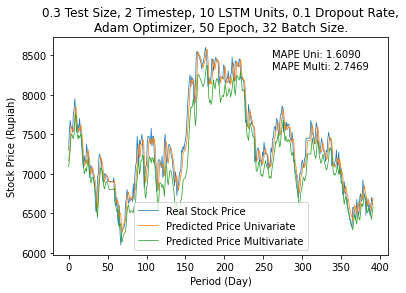

In [32]:
figPredict = plt.gcf()
plt.plot(data_testActual, label = 'Real Stock Price', linewidth=0.75)
plt.plot(data_testPredUni, label = 'Predicted Price Univariate', linewidth=0.75)
plt.plot(data_testPredMulti, label = 'Predicted Price Multivariate', linewidth=0.75)
plt.title(str(n_testProp)+ ' Test Size, ' +str(n_timestep)+ ' Timestep, ' +str(n_LSTMunits)+ ' LSTM Units, ' +str(n_DropoutRate)+ ' Dropout Rate,\n'
          +str(n_optimizer)+ ' Optimizer, ' +str(n_epoch)+ ' Epoch, ' +str(n_batchsize)+ ' Batch Size.')
plt.xlabel('Period (Day)')
plt.ylabel('Stock Price (Rupiah)')
plt.figtext(0.63, 0.77, "MAPE Uni: " +str(MAPEUni)+ "\nMAPE Multi: " +str(MAPEMulti))
plt.legend()
plt.show()

#Save Image of Plot for Forecasting Visualization
figPredict.savefig(pathResults +str(n_testProp)+ ' Test Size, ' +str(n_timestep)+ ' Timestep, ' +str(n_LSTMunits)+ ' LSTM Units, ' +str(n_DropoutRate)+ ' Dropout Rate, '
          +str(n_optimizer)+ ' Optimizer, ' +str(n_epoch)+ ' Epoch, ' +str(n_batchsize)+ ' Batch Size - Testing Result.png', dpi = 100)

# ***Save Forecasting Results***

* **Result Summary**

In [33]:
print("\n=================================\nRECAP RESULT (MAPE, TT, LastLoss)\n=================================\n")
print(str(n_testProp)+ ' Test Size, ' +str(n_timestep)+ ' Timestep, ' +str(n_LSTMunits)+ ' LSTM Units, ' +str(n_DropoutRate)+ ' Dropout Rate,\n'
          +str(n_optimizer)+ ' Optimizer, ' +str(n_epoch)+ ' Epoch, ' +str(n_batchsize)+ ' Batch Size\n')
print("— Univariate Model:")
print("MAPE\t\t= " +MAPEUni+ "\nTraining Time\t= " +TTUni+ "\nLastLoss\t= " +LastLossUni+ "\n")
print("— Multivariate Model:")
print("MAPE\t\t= " +MAPEMulti+ "\nTraining Time\t= " +TTMulti + "\nLastLoss\t= " +LastLossMulti+ "\n")


RECAP RESULT (MAPE, TT, LastLoss)

0.3 Test Size, 2 Timestep, 10 LSTM Units, 0.1 Dropout Rate,
Adam Optimizer, 50 Epoch, 32 Batch Size

— Univariate Model:
MAPE		= 1.6090
Training Time	= 5.0194
LastLoss	= 0.0063

— Multivariate Model:
MAPE		= 2.7469
Training Time	= 4.7619
LastLoss	= 0.0050



* **Save Forecasting Result like Expected Format**

![Illustration Desired Format](https://drive.google.com/uc?id=10AnB3MqGTe9sEma29TzMvmxsv1ufU0zY)



In [0]:
#Merge with Univariate-Multivariate Format
A_EvaluationResult = [[MAPEUni, MAPEMulti], [TTUni, TTMulti], [LastLossUni, LastLossMulti]]
A_EvaluationResult = np.asarray(A_EvaluationResult) #Array String

#Desired Format
A_AnExcelResult = np.concatenate((A_EvaluationResult, A_PredictionResult), axis=0)

#Set to Dataframe
A_AnExcelResult = pd.DataFrame(A_AnExcelResult)
A_AnExcelResult.columns = ['Univariate', 'Multivariate']
A_AnExcelResult.Univariate = A_AnExcelResult.Univariate.str.replace('.', ',')     #Excel Auto Number Format
A_AnExcelResult.Multivariate = A_AnExcelResult.Multivariate.str.replace('.', ',') #Excel Auto Number Format
A_AnExcelResult.to_excel(pathResults +str(n_testProp)+ ' Test Size, ' +str(n_timestep)+ ' Timestep, ' +str(n_LSTMunits)+ ' LSTM Units, ' +str(n_DropoutRate)+ ' Dropout Rate, '
          +str(n_optimizer)+ ' Optimizer, ' +str(n_epoch)+ ' Epoch, ' +str(n_batchsize)+ ' Batch Size - Eval & Predict Excel.xlsx', index = False, header = False) #Header False mulai TimeStep 4